In [1]:
import sklearn.metrics as sk
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

Using TensorFlow backend.


In [3]:
class MNIST_vgg:
    def __init__(self,train=True):
        self.num_classes = 10
        self.weight_decay = 0.0005
        self.x_shape = [32,32,3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('MNIST_vgg.h5')


    def build_model(self):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

        model = Sequential()
        weight_decay = self.weight_decay

        model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        return model


    def normalize(self,X_train,X_test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test

    def normalize_production(self,x):
        #this function is used to normalize instances in production according to saved training set statistics
        # Input: X - a training set
        # Output X - a normalized training set according to normalization constants.

        #these values produced during first training and are general for the standard cifar10 training set normalization
        mean = 120.707
        std = 64.15
        return (x-mean)/(std+1e-7)

    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x,batch_size)

    def train(self,model):

        #training parameters
        batch_size = 128
        maxepoches = 25
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20
        # The data, shuffled and split between train and test sets:
        x_train,y_train,x_test,y_test = mnist_train_RGB_x,M_train_y,mnist_test_RGB_x,M_test_y
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

        #data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)



        #optimization details
        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


        # training process in a for loop with learning rate drop every 25 epoches.

        historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
        model.save_weights('MNIST_vgg.h5')
        return model

In [4]:
class cifar10vgg:
    def __init__(self,train=True):
        self.num_classes = 10
        self.weight_decay = 0.0005
        self.x_shape = [32,32,3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('cifar10vgg.h5')


    def build_model(self):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

        model = Sequential()
        weight_decay = self.weight_decay

        model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        return model


    def normalize(self,X_train,X_test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test

    def normalize_production(self,x):
        #this function is used to normalize instances in production according to saved training set statistics
        # Input: X - a training set
        # Output X - a normalized training set according to normalization constants.

        #these values produced during first training and are general for the standard cifar10 training set normalization
        mean = 120.707
        std = 64.15
        return (x-mean)/(std+1e-7)

    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x,batch_size)

    def train(self,model):

        #training parameters
        batch_size = 128
        maxepoches = 250
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20
        # The data, shuffled and split between train and test sets:
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

        #data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)



        #optimization details
        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


        # training process in a for loop with learning rate drop every 25 epoches.

        historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
        model.save_weights('cifar10vgg.h5')
        return model

### Import the MNIST and CIFAR and make them into the same format

In [5]:
mnist = keras.datasets.mnist
(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
def MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y):
    """
    Change the one-channel to RBG-channel on mnist_train_x and mnist_test_x
    Change the shape of mnist_train_y and mnist_test_y from (length) to (length,1)
    ---------------------------------------
    inputs:
    mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y which is all multi-dimension array
    It is recommended to use the following way to import the data
    ========================== codes ==========================
    mnist = keras.datasets.mnist
    (mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
    ========================== codes ==========================
    outputs:
    mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y 
    """
    from skimage import exposure
    import imutils
    B= []
    for i in range(len(mnist_train_x)):
        A = mnist_train_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_train_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    B= []
    for i in range(len(mnist_test_x)):
        A = mnist_test_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_test_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    M_train_y = np.array([[mnist_train_y[i]] for i in range(len(mnist_train_y))])
    M_test_y = np.array([[mnist_test_y[i]] for i in range(len(mnist_test_y))])
    return mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y

In [6]:
mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y = MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y)
(C_x_train, C_y_train), (C_x_test, C_y_test) = cifar10.load_data()

### Import the pre-trained model

In [7]:
fp = open("MNIST-VGG-1.pkl","rb+")
M_VGG_Model1 = pickle.load(fp, encoding='bytes')
fp = open("MNIST-VGG-2.pkl","rb+")
M_VGG_Model2 = pickle.load(fp, encoding='bytes')
fp = open("MNIST-VGG-3.pkl","rb+")
M_VGG_Model3 = pickle.load(fp, encoding='bytes')
fp = open("CIFAR-VGG-1.pkl","rb+")
C_VGG_Model1 = pickle.load(fp, encoding='bytes')
fp = open("CIFAR-VGG-2.pkl","rb+")
C_VGG_Model2 = pickle.load(fp, encoding='bytes')
fp = open("CIFAR-VGG-3.pkl","rb+")
C_VGG_Model3 = pickle.load(fp, encoding='bytes')

W1126 23:47:21.980545 17420 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1126 23:47:21.992513 17420 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1126 23:47:22.014423 17420 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1126 23:47:22.015422 17420 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is depre

### Get the ID and OD predictions from MNIST and CIFAR

In [9]:
mnist = [[],[]]
cifar = [[],[]]
# mnist_mnist_1,2,3
mnist[1].append(M_VGG_Model1.predict(mnist_test_RGB_x))
mnist[1].append(M_VGG_Model2.predict(mnist_test_RGB_x))
mnist[1].append(M_VGG_Model3.predict(mnist_test_RGB_x))
# mnist_cifar_1,2,3
mnist[0].append(M_VGG_Model1.predict(C_x_train))
mnist[0].append(M_VGG_Model2.predict(C_x_train))
mnist[0].append(M_VGG_Model3.predict(C_x_train))
# cifar_cifar_1,2,3
cifar[1].append(C_VGG_Model1.predict(C_x_test))
cifar[1].append(C_VGG_Model2.predict(C_x_test))
cifar[1].append(C_VGG_Model3.predict(C_x_test))
# cifar_mnist_1,2,3
cifar[0].append(C_VGG_Model1.predict(mnist_train_RGB_x))
cifar[0].append(C_VGG_Model2.predict(mnist_train_RGB_x))
cifar[0].append(C_VGG_Model3.predict(mnist_train_RGB_x))

In [10]:
def gMP(pred):
    """
    This function return the max_prob from the prediction matrix
    """
    pred = np.array(pred)
    A = []
    for i in range(len(pred)):
        A.append(max(pred[i]))
    return A

In [11]:
def gMlogP(pred):#get_max_prob
    pred = np.array(pred)
    A = []
    for i in range(len(pred)):
        A.append(np.log((max(pred[i])-0.1)*(math.e-1)/0.9+1))
    return A

### Construct the y_score and y_true

In [12]:
def get_y_scores(mnist_or_cifar,func_gMP):
    y_scores = []
    for i in range(3):
        y_scores.append(func_gMP(mnist_or_cifar[1][i])+func_gMP(mnist_or_cifar[0][i]))
    return y_scores

def get_y_true(mnist_or_cifar):
    return [1]*len(mnist_or_cifar[1][0])+[0]*len(mnist_or_cifar[0][0])

In [13]:
y_scores_M = get_y_scores(mnist,gMP)#y_scores_M1+y_scores_M2+y_scores_M3
y_scores_C = get_y_scores(cifar,gMP)#y_scores_C1+y_scores_C2+y_scores_C3

In [14]:
y_true_M = get_y_true(mnist)
y_true_C = get_y_true(cifar)

In [34]:
def plot_max_prob_dist(mnist_or_cifar, name, func_gMP):
    """
    This function plots the distribution of the max_prediction_prob in ID test, OD test and total
    ---------------------------------------
    inputs:
    mnist_or_cifar || an array shaped (2,3), which is the the MNIST predictions (3 models)\
                        the first dimension is the OD predictions and the second dimension is the ID predictions
    name || the name of the input ID
    func_gMP || the function used to get the max prob from the prediction matrix
                can be changed into others stats got by the prediction matrix (like entropy)
    """
    if name == 'mnist':
        alter_name = 'cifar'
    elif name == 'cifar':
        alter_name = 'mnist'
    else:
        print("ERROR input name")
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(3, 3, i*3+1)
        plt.hist(func_gMP(mnist_or_cifar[0][i]), bins=50)
        plt.title(name+'_'+alter_name+'_'+ str(i))
        plt.subplot(3, 3, i*3+2)
        plt.hist(func_gMP(mnist_or_cifar[1][i]), bins=50)
        plt.title(name+'_'+name+'_'+ str(i))
        plt.subplot(3, 3, i*3+3)
        plt.hist(func_gMP(mnist_or_cifar[0][i])+func_gMP(mnist_or_cifar[1][i]), bins=50)
        plt.title('total_' + str(i))
    plt.show()

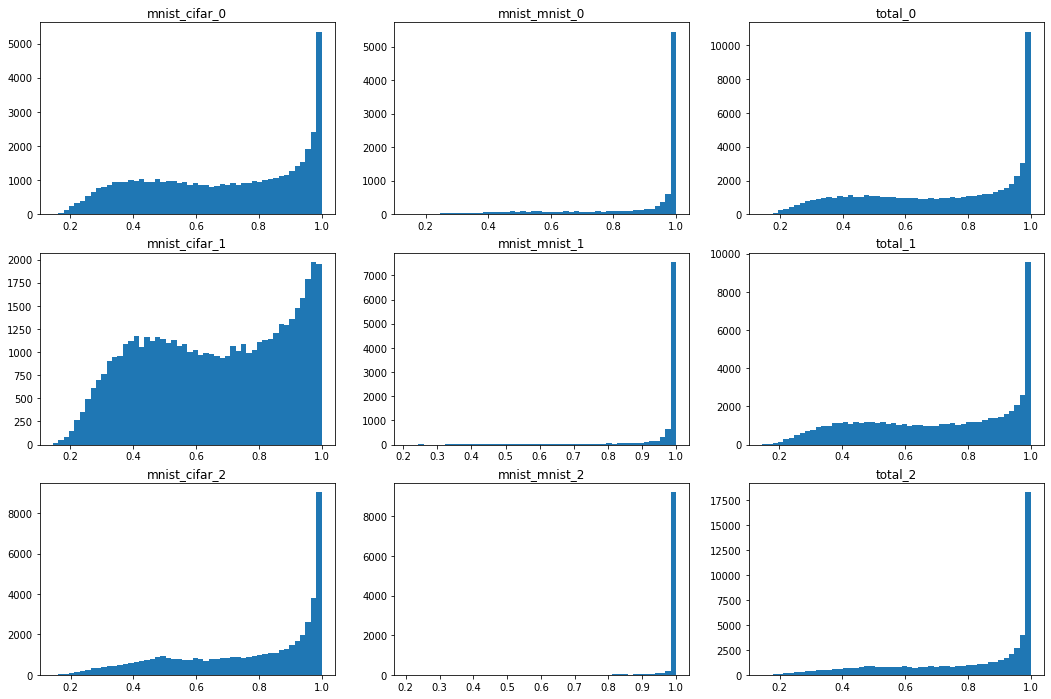

In [16]:
plot_max_prob_dist(mnist,'mnist',gMP)

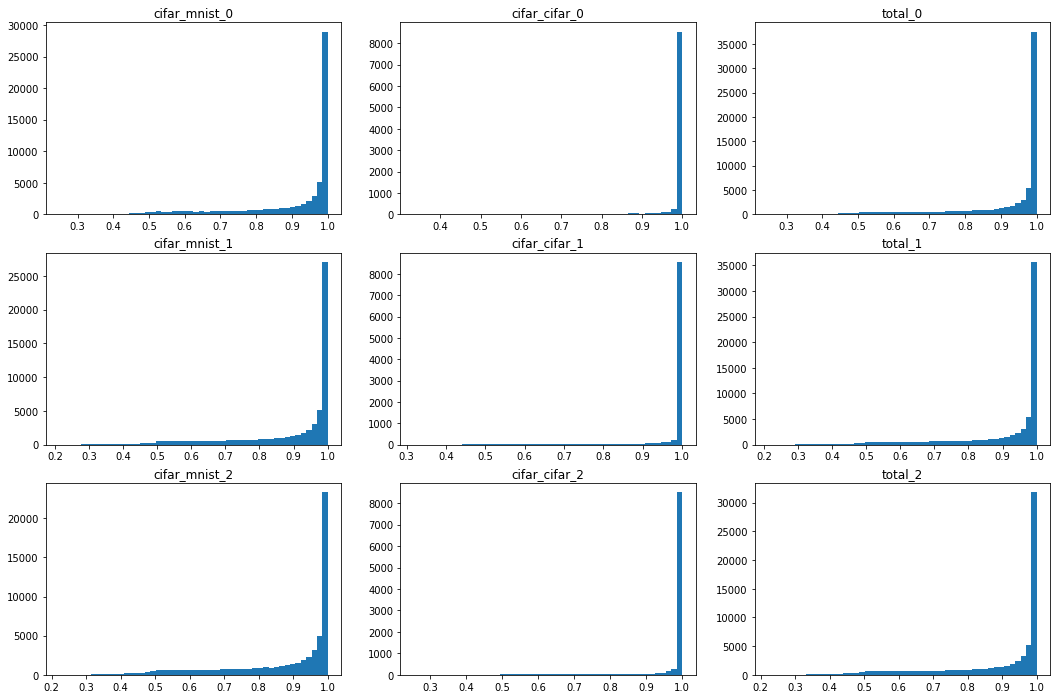

In [17]:
plot_max_prob_dist(cifar,'cifar',gMP)

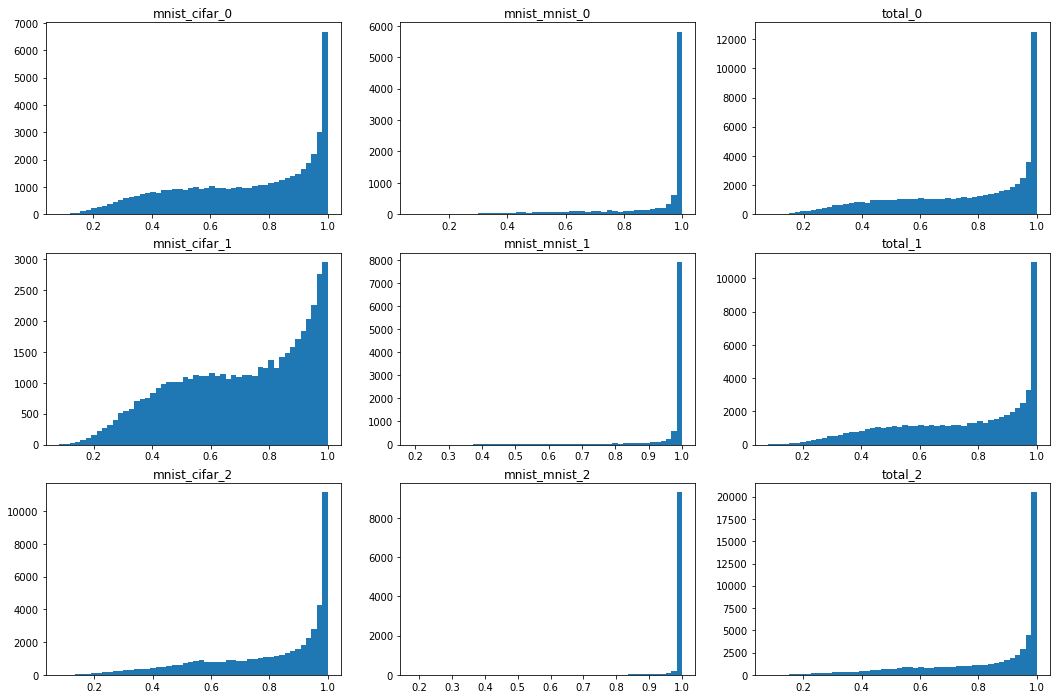

In [18]:
plot_max_prob_dist(mnist,'mnist',gMlogP)

In [19]:
for i in range(3):
    print('average_precision_score for MNIST_'+str(i+1))
    print(average_precision_score(y_true_M, y_scores_M[i]))
    print('roc_auc_score for MNIST_'+str(i+1))
    print(roc_auc_score(y_true_M, y_scores_M[i]))
for i in range(3):
    print('average_precision_score for CIFAR_'+str(i+1))
    print(average_precision_score(y_true_C, y_scores_C[i]))
    print('roc_auc_score for CIFAR_'+str(i+1))
    print(roc_auc_score(y_true_C, y_scores_C[i]))

average_precision_score for MNIST_1
0.48832617554570246
roc_auc_score for MNIST_1
0.7739900599999999
average_precision_score for MNIST_2
0.8483660594155104
roc_auc_score for MNIST_2
0.934979273
average_precision_score for MNIST_3
0.8737420804965867
roc_auc_score for MNIST_3
0.951166895
average_precision_score for CIFAR_1
0.6117257471397494
roc_auc_score for CIFAR_1
0.8317970166666666
average_precision_score for CIFAR_2
0.640817705926024
roc_auc_score for CIFAR_2
0.8473103383333334
average_precision_score for CIFAR_3
0.6354215385145034
roc_auc_score for CIFAR_3
0.8497330916666667


In [21]:
if False:
    """
    y_scores_M_log = get_y_scores(mnist,gMlogP)#y_scores_M1+y_scores_M2+y_scores_M3
    y_scores_C_log = get_y_scores(cifar,gMlogP)#y_scores_C1+y_scores_C2+y_scores_C3
    for i in range(3):
        print('average_precision_score for MNIST_'+str(i+1))
        print(average_precision_score(y_true_M, y_scores_M_log[i]))
        print('roc_auc_score for MNIST_'+str(i+1))
        print(roc_auc_score(y_true_M, y_scores_M_log[i]))
    for i in range(3):
        print('average_precision_score for CIFAR_'+str(i+1))
        print(average_precision_score(y_true_C, y_scores_C_log[i]))
        print('roc_auc_score for CIFAR_'+str(i+1))
        print(roc_auc_score(y_true_C, y_scores_C_log[i]))
    """

### MNISTwithout7-CIFARwithout3

In [22]:
fp = open("MNISTno7-3-VGG-1.pkl","rb+")
Mno7_VGG_Model4 = pickle.load(fp, encoding='bytes')
fp = open("MNISTno7-3-VGG-2.pkl","rb+")
Mno7_VGG_Model5 = pickle.load(fp, encoding='bytes')
fp = open("MNISTno7-3-VGG-3.pkl","rb+")
Mno7_VGG_Model6 = pickle.load(fp, encoding='bytes')

In [25]:
def find_idx(arr, target):
    """
    This function return an array including all the idx of a certain target of the given array
    
    Inputs:
    arr || a list to find the target
    target || int or float, the target need to be searched in arr
    
    Outputs：
    ans || a list includes all the idx of a certain target of the given array
    
    ================== example ==================
    >>> find_idx([1,1,1,2],1)
        [0,1,2]
    >>> find_idx([1,1,1,2],2)
        [3]
    """
    ans = []
    for i in range(len(arr)):
        if arr[i] == target:
            ans.append(i)
    return ans
def separate_one_class(target_class_label, x_train, y_train, x_test, y_test):
    """
    This function returns the train and the test dataset with or without the class which needs separated
    
    Inputs:
    target_class_label || int, the label of the class which needs separated from the dataset
    x_train, y_train, x_test, y_test || list
    
    Outputs：
    with_train, with_train_y, 
    without_train, without_train_y, 
    with_test, with_test_y, 
    without_test, without_test_y 
    || list, the train and the test dataset with or without the class which needs separated
    """
    with_train_idx = find_idx(y_train, target_class_label)
    with_test_idx = find_idx(y_test, target_class_label)
    without_train_idx = list(set(range(len(y_train))).difference(set(with_train_idx)))
    without_test_idx = list(set(range(len(y_test))).difference(set(with_test_idx)))
    with_train = x_train[with_train_idx]
    with_test = x_test[with_test_idx]
    without_train = x_train[without_train_idx]
    without_test = x_test[without_test_idx]
    with_train_y = y_train[with_train_idx]
    with_test_y = y_test[with_test_idx]
    without_train_y = y_train[without_train_idx]
    without_test_y = y_test[without_test_idx]
    return with_train, with_train_y, without_train, without_train_y, with_test, with_test_y, without_test, without_test_y

In [26]:
M_7_train, M_7_train_y, M_no7_train, M_no7_train_y, M_7_test, M_7_test_y, M_no7_test, M_no7_test_y = separate_one_class(7, mnist_train_RGB_x, mnist_train_y, mnist_test_RGB_x, mnist_test_y)
M_no7_train_y = np.array([[M_no7_train_y[i]] for i in range(len(M_no7_train_y))])
M_no7_test_y = np.array([[M_no7_test_y[i]] for i in range(len(M_no7_test_y))])
M_7_train_y = np.array([[M_7_train_y[i]] for i in range(len(M_7_train_y))])
M_7_test_y = np.array([[M_7_test_y[i]] for i in range(len(M_7_test_y))])
C_y_train_flat = [C_y_train[i][0] for i in range(len(C_y_train))]
C_y_test_flat = [C_y_test[i][0] for i in range(len(C_y_test))]
C_3_train_idx = find_idx(C_y_train_flat, 3)
C_3_test_idx = find_idx(C_y_test_flat, 3)
C_no3_train_idx = list(set(range(len(C_y_train_flat))).difference(set(C_3_train_idx)))
C_no3_test_idx = list(set(range(len(C_y_test_flat))).difference(set(C_3_test_idx)))
C_3_train = C_x_train[C_3_train_idx]
C_3_test = C_x_test[C_3_test_idx]
C_no3_train = C_x_train[C_no3_train_idx]
C_no3_test = C_x_test[C_no3_test_idx]
C_3_train_y = C_y_train[C_3_train_idx]
C_3_test_y = C_y_test[C_3_test_idx]
C_no3_train_y = C_y_train[C_no3_train_idx]
C_no3_test_y = C_y_test[C_no3_test_idx]

In [27]:
mnist_no7_cifar_no3 = [[],[]]
# mnist_mnist_1,2,3
mnist_no7_cifar_no3[1].append(Mno7_VGG_Model4.predict(M_no7_test))
mnist_no7_cifar_no3[1].append(Mno7_VGG_Model5.predict(M_no7_test))
mnist_no7_cifar_no3[1].append(Mno7_VGG_Model6.predict(M_no7_test))
# mnist_cifar_1,2,3
mnist_no7_cifar_no3[0].append(Mno7_VGG_Model4.predict(C_no3_train))
mnist_no7_cifar_no3[0].append(Mno7_VGG_Model5.predict(C_no3_train))
mnist_no7_cifar_no3[0].append(Mno7_VGG_Model6.predict(C_no3_train))

In [28]:
y_scores_Mno7_Cno3 = get_y_scores(mnist_no7_cifar_no3,gMP)#y_scores_M1+y_scores_M2+y_scores_M3
y_true_Mno7_Cno3 = get_y_true(mnist_no7_cifar_no3)

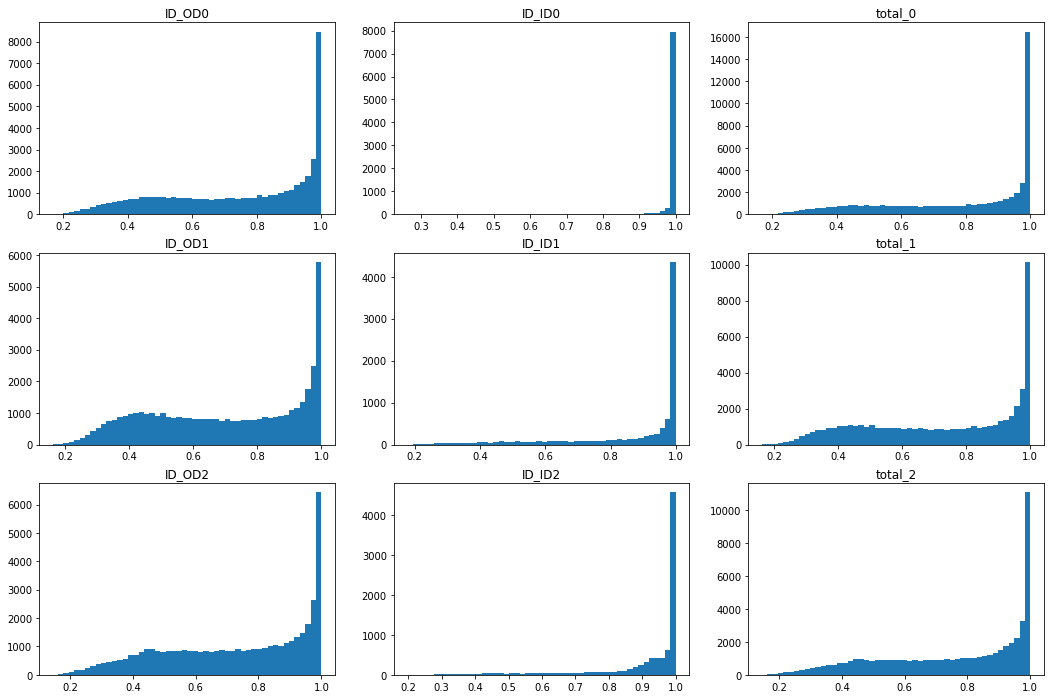

In [30]:
def plot_max_prob_dist(mnist_or_cifar, func_gMP):
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(3, 3, i*3+1)
        plt.hist(func_gMP(mnist_or_cifar[0][i]), bins=50)
        plt.title('ID_OD'+ str(i))
        plt.subplot(3, 3, i*3+2)
        plt.hist(func_gMP(mnist_or_cifar[1][i]), bins=50)
        plt.title('ID_ID'+ str(i))
        plt.subplot(3, 3, i*3+3)
        plt.hist(func_gMP(mnist_or_cifar[0][i])+func_gMP(mnist_or_cifar[1][i]), bins=50)
        plt.title('total_' + str(i))
    plt.show()
plot_max_prob_dist(mnist_no7_cifar_no3,gMP)

In [32]:
for i in range(3):
    print('average_precision_score'+str(i+1))
    print(average_precision_score(y_true_Mno7_Cno3, y_scores_Mno7_Cno3[i]))
    print('roc_auc_score'+str(i+1))
    print(roc_auc_score(y_true_Mno7_Cno3, y_scores_Mno7_Cno3[i]))

average_precision_score1
0.639262901033767
roc_auc_score1
0.9097947069896467
average_precision_score2
0.43183674007533684
roc_auc_score2
0.7474948370238272
average_precision_score3
0.5238476000014309
roc_auc_score3
0.7870214531629266
